In [6]:
from PYME.localization.FitFactories import DumbellFitR as dbfr
import numpy as np
import matplotlib.pyplot as plt


In [48]:
roiHalfSize = 10 # [pixels]

xx = np.mgrid[(-roiHalfSize):(roiHalfSize + 1)]
yy = np.mgrid[(-roiHalfSize):(roiHalfSize + 1)]

# A, x0, y0, B, x1, y1, s, bg = p
amp1, amp2 = 100., 100.
b = 10
sigma = 1.5
half_length = 1.5 * sigma
x0, y0 = -half_length, -half_length
x1, y1 = half_length, half_length

p = amp1, x0, y0, amp2, x1, y1, sigma, b
A, x0, y0, B, x1, y1, s, bg = p  # translate to David's
X, Y = xx[:, None], yy[None, :]
# r = A*np.exp(-((X-x0)**2 + (Y - y0)**2)/(2*s**2)) + B*np.exp(-((X-x1)**2 + (Y - y1)**2)/(2*s**2)) + bg 


model_dumbell = dbfr.f_dumbell(p, xx, yy)

In [32]:
print([model_dumbell.min(), model_dumbell.max()])

[10.0, 107.29307495701516]


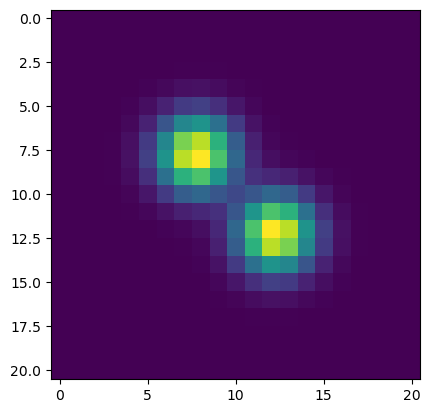

In [33]:
plt.figure()
plt.imshow(model_dumbell)
plt.show()

In [38]:
# def k1(theta):
#     thetaj = 0
#     return (1/3) * (1 + 2 * np.cos(2 * (theta - thetaj)))
# def k2(theta):
#     thetaj = 60 * np.pi / 180
#     return (1/3) * (1 + 2 * np.cos(2 * (theta - thetaj)))
# def k3(theta):
#     thetaj = 120 * np.pi / 180
#     return (1/3) * (1 + 2 * np.cos(2 * (theta - thetaj)))
# def G2_1(x, y):
#     # 0 degrees
#     return (4 * x**2 - 2) * np.exp( - (x ** 2 + y ** 2))
# def G2_2(x, y):
#     # 60 degrees
#     return
# def G2_3(x, y):
#     # 120 degrees
#     return

In [39]:
# see pg 39, http://robots.stanford.edu/cs223b04/SteerableFiltersfreeman91design.pdf

def ka(theta):
    return np.cos(theta)**2
def kb(theta):
    return -2 * np.cos(theta) * np.sin(theta)
def kc(theta):
    return np.sin(theta)**2

def g2a(x, y):
    return 0.9213 * (2 * x**2 - 1) * np.exp(- (x**2 + y**2))

def g2b(x, y):
    return 1.843*x*y*np.exp(- (x**2 + y**2))

def g2c(x, y):
    return 0.9213 * (2 * y**2 - 1) * np.exp(- (x**2 + y**2))


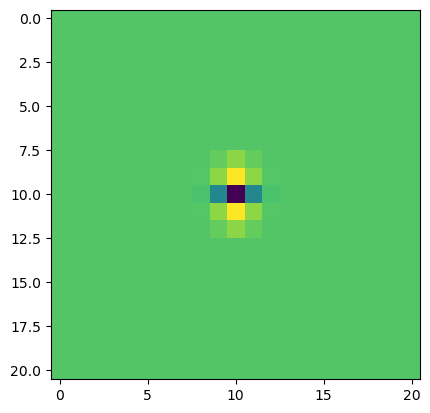

In [42]:
f1 = g2a(X, Y)
plt.imshow(f1)

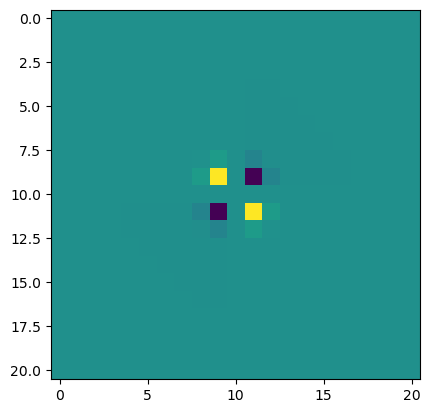

In [43]:
f2 = g2b(X, Y)
plt.imshow(f2)

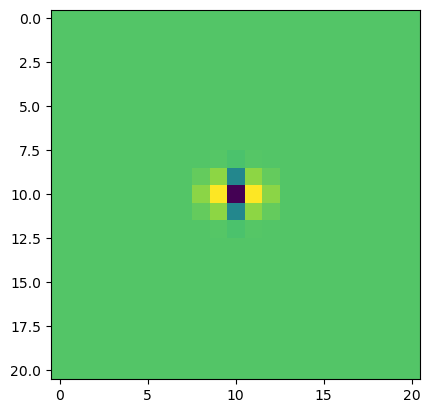

In [45]:
f3 = g2c(X, Y)
plt.imshow(f3)

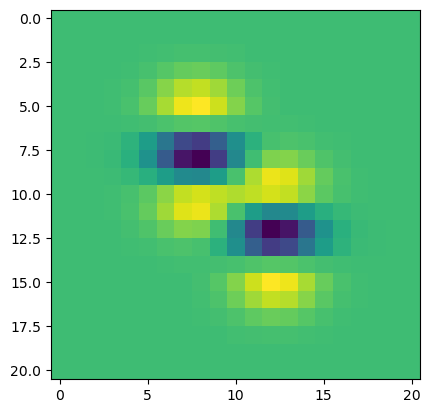

In [50]:
from scipy import ndimage
c1 = ndimage.convolve(model_dumbell, f1)
plt.figure()
plt.imshow(c1)

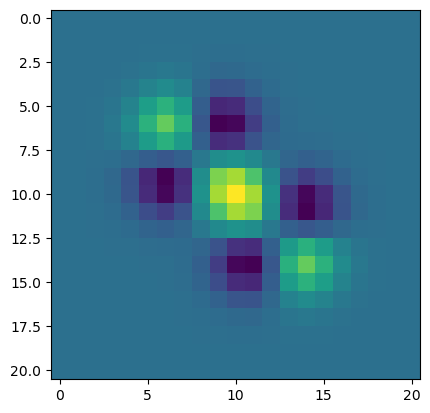

In [52]:
c2 = ndimage.convolve(model_dumbell, f2)
plt.figure()
plt.imshow(c2)

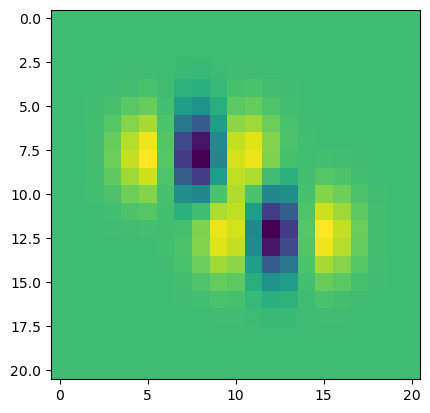

In [53]:
c3 = ndimage.convolve(model_dumbell, f3)
plt.figure()
plt.imshow(c3)

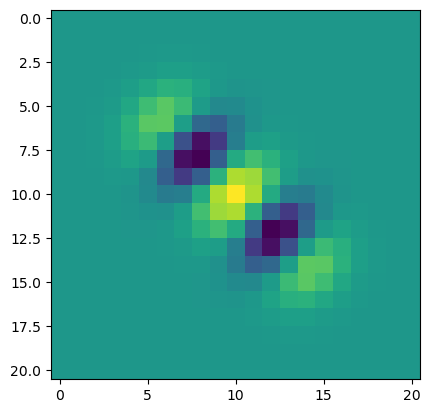

In [58]:
theta = -45 * np.pi/180
g_2_theta = (ka(theta) * c1 + kb(theta) * c2 + kc(theta) * c3)
plt.figure()
plt.imshow(g_2_theta)